In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [72]:
#from google.colab import drive
#drive.mount('/content/drive')

In [73]:
path="C:\Adrian\Egyetem-Msc\Deep Learning Python es LUA alapon\Project"

In [74]:
def top_p_percent_acc(data, p):
    cat_num=len(list(data.columns))-2  #number of categories = number of columns - 2 (number of picture, true_label)
    val_size=len(list(data.index)) #number of validation data points
    p_percent=int(p/100*cat_num) #p percent of the validation size
    acc=0
    for row,i in data.iterrows():
        best_p_indices=np.array(i[:len(i)-2]).argsort()[-p_percent:][::-1]  #the p% largest probabilities
        best_p_columns=[data.columns[j] for j in best_p_indices]  #the corresponding classes
        true_label=str(int(i["original_class"])) #str(train.loc[i["picture"],"landmark_id"])  #the true class of the data point
        if true_label in best_p_columns:
            acc+=1
    acc=acc/val_size
    return acc

In [75]:
def top_p_percent_plot(data, P_list):
    cat_num=len(list(data.columns))-2  #number of categories = number of columns - 2 (number of picture, true_label)
    val_size=len(list(data.index)) #number of validation data points

    values=[]
    for p in P_list:
        acc=top_p_percent_acc(data, p)
        values.append(acc)

    plt.plot(P_list, values, color="green")
    plt.title('P-percent accuracies')
    plt.xlabel('P values')
    plt.ylabel('P-Accuracy')
    #plt.ylim([-0.05, 1.05])
    plt.show()

In [76]:
def plot_example(class_name):
  #from the train csv file we are searching for those image ids that have the class_name as landmark_id and add them to a list
  image_ids = train[train['landmark_id'] == int(class_name)]['id'].values

  mainpath = './landmark-recognition-2021/train'
  image_path = []

  # We have to create the directories for the pictures, we could also use os.listdir, but this was less complicated
  for i in range(0,len(image_ids)):
      first_dir = os.path.join(mainpath,image_ids[i][0])
      second_dir = os.path.join(first_dir,image_ids[i][1])
      third_dir = os.path.join(second_dir,image_ids[i][2])
      finalpath = os.path.join(third_dir,image_ids[i]+'.jpg')

      image_path.append(finalpath)

  #plotting 5 images from our class
  fig = plt.gcf()
  fig.set_size_inches(16, 16)
  next_pix = image_path
  random.shuffle(next_pix)
  for i, img_path in enumerate(next_pix[0:5]):
      sp = plt.subplot(1, 5, i + 1)
      sp.axis('Off')
      img = mpimg.imread(img_path)
      plt.imshow(img)
  plt.show()

In [77]:
def best_worst_class(data):
    accuracies=[] #this list will contain the accuracies of the classes
    for class_num in data.columns[:len(data.columns)-2]:
        class_data=data[data["original_class"]==float(class_num)]  #validation data points from this class
        acc=top_p_percent_acc(class_data, 2)    #accuracy of the validation data from this class
        accuracies.append(acc)
    best_3_index=np.array(accuracies).argsort()[-3:][::-1]  #the indices of the 3 highest accuracy
    best_3_class=[class_data.columns[j] for j in best_3_index] #the 3 corresponding classes
    best_3_accuracy=[accuracies[j] for j in best_3_index]  #the 3 highest accuracy
    worst_3_index=np.array(accuracies).argsort()[:3]  #the indices of the 3 lowest accuracy
    worst_3_class=[class_data.columns[j] for j in worst_3_index] #the 3 corresponding classes
    worst_3_accuracy=[accuracies[j] for j in worst_3_index] #the 3 lowest accuracy

    print(f"The 3 highest accuracy: {best_3_accuracy}")
    print(f"The classes:            {best_3_class}")
    print("Some examples from these 3 classes:")
    for i in best_3_class:
        plot_example(i)  #plot some picture from these classes -> it can be seen why it was so easy/difficult to classify these pictures
    print(f"The 3 lowest accuracy: {worst_3_accuracy}")
    print(f"The classes:           {worst_3_class}")
    print("Some examples from these 3 classes:")
    for i in worst_3_class:
        plot_example(i)


In [78]:
### befejezni ###

def best_worst_with_other_metrics(data, metric):
    rankings=[]
    for class_num in data.columns[:len(data.columns)-2]:
        class_data=data[data["original_class"]==float(class_num)]  #validation data points from this class
        true_label=class_data["original_class"]
        pred_label=class_data[""]  #ezt megírni

        acc=top_p_percent_acc(class_data, 2)    #és ezt a metrikával
        rankings.append(acc)

    best_3_index=np.array(rankings).argsort()[-3:][::-1]  #the indices of the 3 highest accuracy
    best_3_class=[class_data.columns[j] for j in best_3_index] #the 3 corresponding classes
    best_3_accuracy=[rankings[j] for j in best_3_index]  #the 3 highest accuracy
    worst_3_index=np.array(rankings).argsort()[:3]  #the indices of the 3 lowest accuracy
    worst_3_class=[class_data.columns[j] for j in worst_3_index] #the 3 corresponding classes
    worst_3_accuracy=[rankings[j] for j in worst_3_index] #the 3 lowest accuracy


In [79]:
def acc_class_size(data):  #we would like to investigate if the the accuracy and the size of the class are correlated
    accuracies=[] #this list will contain the accuracies of the classes
    sizes=[]
    for class_num in data.columns[:len(data.columns)-2]:
        class_data=data[data["original_class"]==float(class_num)]  #validation data points from this class
        acc=top_p_percent_acc(class_data, 2)    #accuracy of the validation data from this class
        accuracies.append(acc)
        class_size=train[train["landmark_id"]==float(class_num)]["label_count"].values[0] #size of the class
        sizes.append(class_size)
    order=np.array(accuracies).argsort() #order the two list according to the accuracies
    accuracies=[accuracies[i] for i in order]
    sizes=[sizes[i] for i in order]
    sizes=[(sizes[i]-min(sizes))/(max(sizes)-min(sizes)) for i in range(len(sizes))] #normalize the sizes into [0, 1]
    corr=round(np.corrcoef(accuracies, sizes)[0, 1],4)
    label="corr="+str(corr)
    plt.scatter(accuracies, sizes, label=label)
    plt.ylabel("Size of the class")
    plt.xlabel("Accuracy of the class")
    plt.legend()
    plt.show()


In [80]:
train=pd.read_csv(f"{path}/train_corrected.csv")
print(len(train))
train.head()

1580470


,Unnamed: 0,id,landmark_id,label_count,encoded_landmark_id
0,1081003,9a126324e671e76c,138982,6272,0
1,1077888,1a4519d92d84b71f,138982,6272,0
2,1077866,1939983af1b00f72,138982,6272,0
3,1077867,1941e9371698fc3a,138982,6272,0
4,1077868,195159c30049fa4e,138982,6272,0


In [81]:
resnet50_pred_50classes=pd.read_csv(f'{path}/preds/Resnet50_encdingFixed_50classes_val_pred.csv')
resnet50_pred_50classes.head(5)

,138982,126637,20409,83144,113209,177870,194914,149980,139894,1924,...,64792,80177,27190,152708,143710,31531,27,113838,picture,original_class
0,4.427890e-10,9.606546e-01,2.905655e-02,4.474935e-06,1.118125e-13,2.182501e-04,1.370927e-03,1.143879e-06,1.062236e-08,3.299355e-08,...,3.411397e-06,3.324194e-07,1.754975e-10,7.054383e-08,4.615209e-05,4.310033e-10,2.222277e-07,1.371590e-05,982852,126637
1,6.066378e-09,1.750459e-05,2.104381e-05,3.801146e-06,8.331301e-07,1.758678e-05,8.140135e-08,4.793713e-05,2.906235e-06,2.167012e-04,...,3.978935e-06,1.890422e-08,5.582183e-06,1.507034e-05,1.230194e-04,8.064603e-06,6.552651e-06,1.087854e-07,1484860,190822
2,5.348528e-05,5.571348e-01,7.272437e-05,8.142236e-03,6.678970e-03,3.176649e-02,2.801980e-04,7.061722e-03,4.661689e-05,2.725603e-02,...,3.673971e-03,8.448251e-05,3.273473e-04,4.836184e-03,3.042392e-03,5.539741e-04,5.347290e-03,7.275189e-04,1285446,165596
3,1.000000e+00,1.676887e-19,4.837625e-22,1.825649e-24,2.618566e-31,3.642939e-20,1.680591e-31,9.635039e-25,4.243743e-23,2.768296e-27,...,1.351033e-21,1.409202e-25,4.050126e-27,1.702273e-20,9.185264e-25,2.462957e-24,5.256739e-24,3.604986e-23,1077338,138982
4,1.281453e-08,1.129041e-03,3.131919e-06,3.848836e-03,9.028728e-06,4.808039e-04,9.046505e-01,1.254946e-04,2.192562e-06,1.808405e-04,...,3.329237e-04,3.983239e-11,3.163037e-08,2.975929e-05,4.084452e-05,1.142680e-04,5.990778e-05,4.509418e-04,1518286,194914


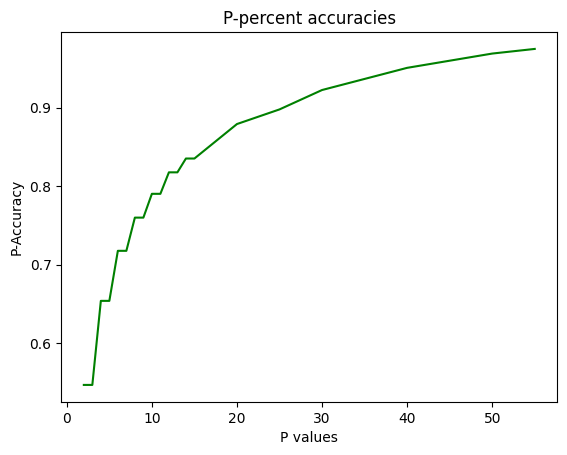

In [82]:
top_p_percent_plot(resnet50_pred_50classes, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 40, 50, 55])

The 3 highest accuracy: [0.9957219251336898, 0.9047619047619048, 0.8125]
The classes:            ['138982', '120734', '194914']
Some examples from these 3 classes:


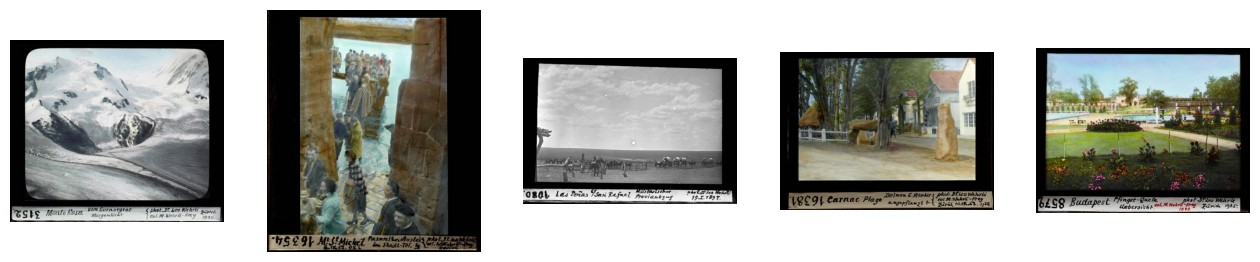

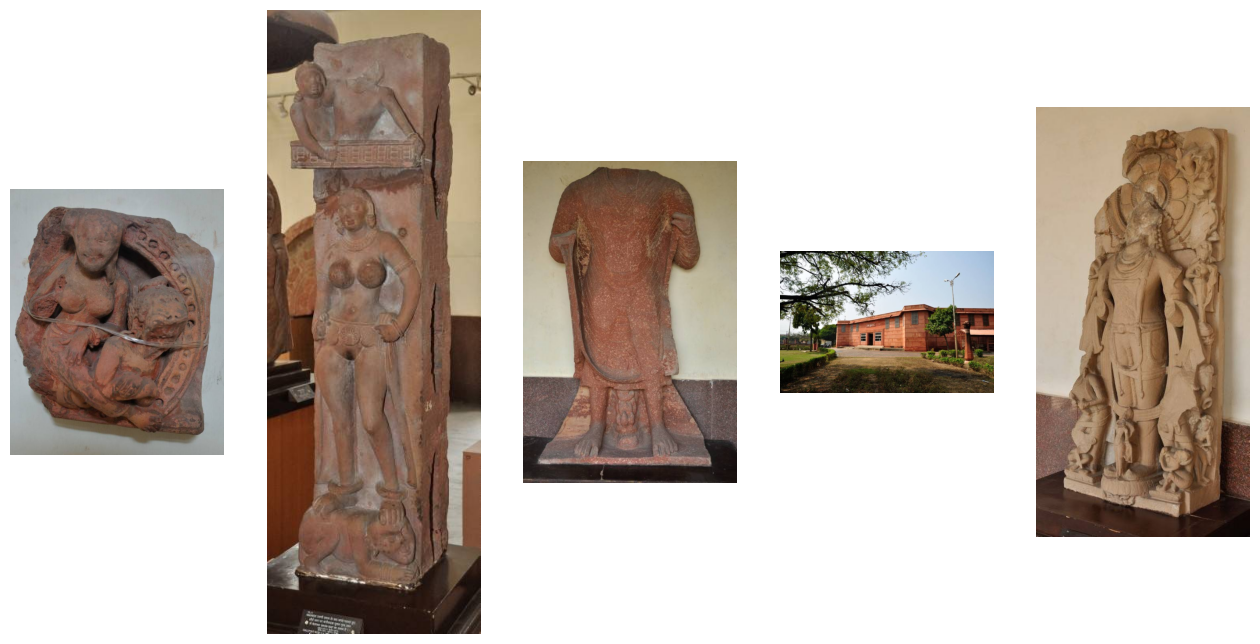

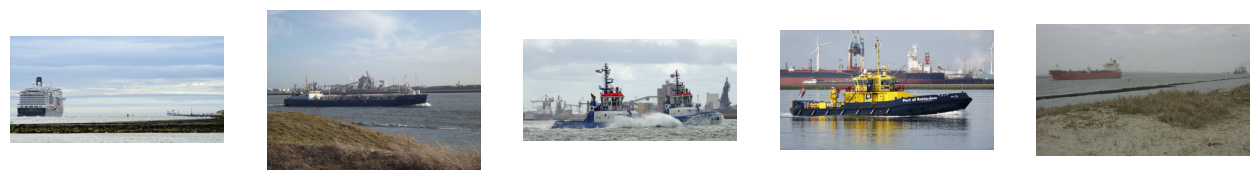

The 3 lowest accuracy: [0.09401709401709402, 0.1348314606741573, 0.13829787234042554]
The classes:           ['187779', '31531', '191292']
Some examples from these 3 classes:


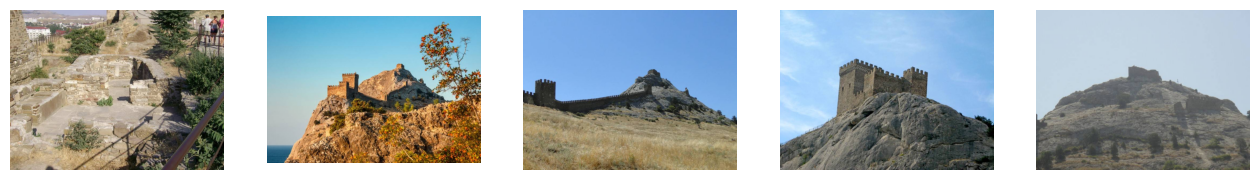

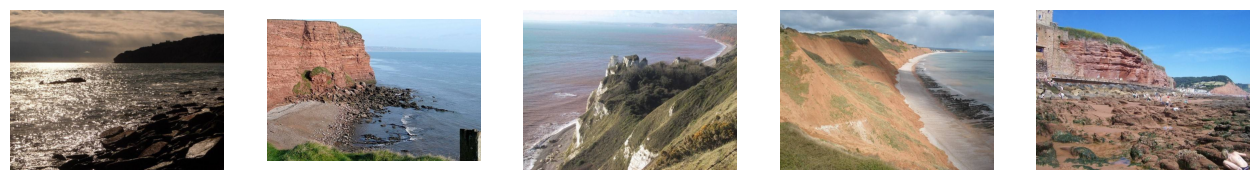

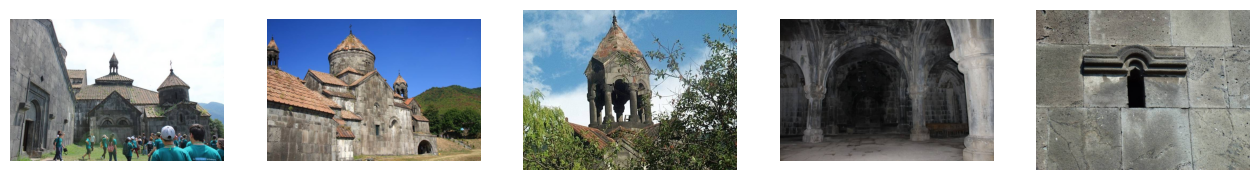

In [83]:
best_worst_class(resnet50_pred_50classes)

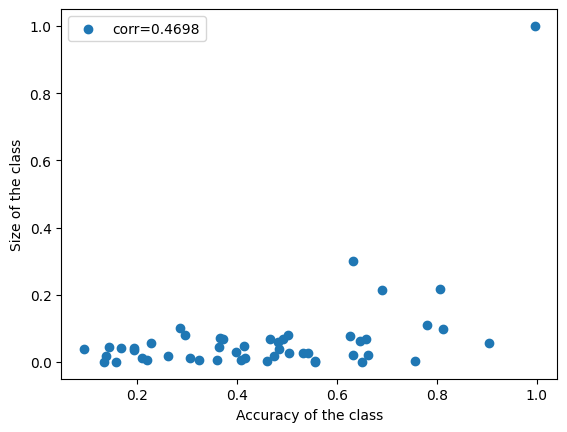

In [84]:
acc_class_size(resnet50_pred_50classes)

In [85]:
# precision, recall alapján más eredmény jön-e ki
# van-e korreláció acc és darabszám között